<a href="https://colab.research.google.com/github/reefwn/manning-live-project/blob/main/getting-started-with-google-colab-using-tensorflow/workflow-1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### 1. What is Colab? Watch the Get started with Google Colaboratory video to get a high level overview of Colab.

https://www.youtube.com/watch?v=inN8seMm7UI

#### 2. If you don’t have a Google account, please register and sign in.

#### 3. First, make a simple Notebook that contains two cells:

a) a Markdown cell with some LaTeX equation describing the Pythagorean theorem,

b) a Code cell in which you implement a function that returns the Hypotenuse given the Adjacent and the Opposite.

Print the return value of the function after calling it with arguments 1 and 2.

In [1]:
# a Markdown cell with some LaTeX equation describing the Pythagorean theorem

$$ a^2+b^2=c^2 $$

In [2]:
# a Code cell in which you implement a function that returns the Hypotenuse given the Adjacent and the Opposite
import math
def hypotenuse(a, b):
  return math.sqrt((a**2 + b**2))

In [3]:
# print the return value of the function after calling it with arguments 1 and 2
hypotenuse(1, 2)

2.23606797749979

#### 4. Save the Notebook into your Google Drive.

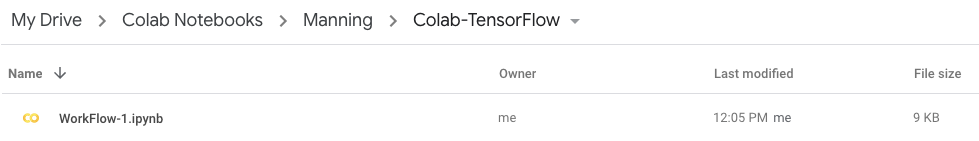

#### 5. Add a new code cell. Import statements to import scikit-learn, TensorFlow, PyTorch, and NumPy. Evaluate the cell. The cell should run without running into any problem. Colab comes with the main data science packages, so you don’t have to install them. Whenever you need to install something, you can do it the “Jupyter way”, namely by preceding pip install PackageName with an exclamation mark.

In [4]:
# import statements to import scikit-learn, TensorFlow, PyTorch, and NumPy
import sklearn
import tensorflow as tf
import torch
import numpy as np

#### 6. Start a new text cell that contains at least a title, for example, "Naïve Bayes".

# Naive Bayes

#### 7. Mount your Google Drive to your Colab Notebook.

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#### 8. Download the SMS Spam Collection dataset, uncompress it and upload it to your Google Drive. You can find more information on the dataset at its [website](https://www.dt.fee.unicamp.br/~tiago/smsspamcollection/).

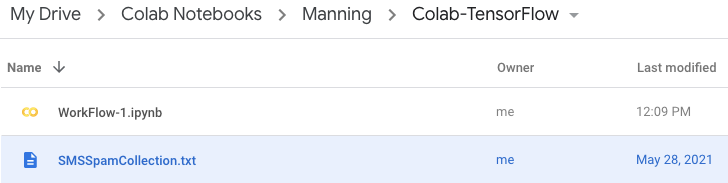

#### 9. First, read in the SMS Spam Collection data. Make two lists:

a) A list that contains the category of the SMS (ham or spam),

b) A list that contains the text of the SMS. Try to put it into all lowercase and filter out punctuation marks.

In [6]:
import string

In [7]:
file_prefix = '/content/drive/MyDrive/Colab Notebooks/Manning/Colab-TensorFlow'

In [8]:
file = '{}/SMSSpamCollection.txt'.format(file_prefix)

In [9]:
rows = [line.strip() for line in open(file)]

In [10]:
# a list that contains the category of the SMS (ham or spam)
# a list that contains the text of the SMS
category = []
text = []

for record in rows:
  cat, txt = record.split("\t")
  cleantxt = txt.lower().translate(str.maketrans("", "", string.punctuation))

  category.append(cat)
  text.append(cleantxt)

#### 10. Split the data into a train and a test dataset.

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(text, category)

#### 11. Use `sklearn.feature_extraction.text.CountVectorizer` to vectorize the training and test texts. Do not forget to use the words in the training set as a vocabulary for vectorization.

In [13]:
# vectorize the training and test texts
from sklearn.feature_extraction.text import CountVectorizer

In [14]:
vectorizer = CountVectorizer()
X_train_v = vectorizer.fit_transform(X_train)

In [15]:
vector = CountVectorizer(vocabulary=vectorizer.vocabulary_)
X_test_v = vector.fit_transform(X_test)

#### 12. Save the vectorized training and test data along with the labels.

In [16]:
# save the vectorized training and test data along with the labels
from pickle import dump

In [17]:
output = '{}/vectorized_data.pkl'.format(file_prefix)

In [18]:
dump([X_train_v, X_test_v, y_train, y_test], open(output, 'wb'))

#### 13. Train a MultinomialNB classifier based on the training data.

In [19]:
# train a MultinomialNB classifier based on the training data
from sklearn.naive_bayes import MultinomialNB

In [20]:
mnNB = MultinomialNB()

In [21]:
mnNB.fit(X_train_v, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

#### 14. Save your classifier on Google Drive using the joblib package.

In [22]:
# save classifier on Google Drive using the joblib package
from joblib import dump

In [23]:
output = '{}/multinomialNB_model.joblib'.format(file_prefix)

In [24]:
dump(mnNB, output)

['/content/drive/MyDrive/Colab Notebooks/Manning/Colab-TensorFlow/multinomialNB_model.joblib']

#### 15. Start a new code cell, load your saved model and evaluate it by using `sklearn.metrics.classification_report`.

In [25]:
# load your saved model
from joblib import load

In [26]:
mnNB = load(output)

In [27]:
y_pred = mnNB.predict(X_test_v)

In [28]:
# evaluate it by using sklearn.metrics.classification_report
from sklearn.metrics import classification_report

In [29]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         ham       0.99      0.99      0.99      1200
        spam       0.96      0.92      0.94       194

    accuracy                           0.98      1394
   macro avg       0.97      0.96      0.97      1394
weighted avg       0.98      0.98      0.98      1394



#### References:
1. https://careerkarma.com/blog/python-remove-punctuation/
2. https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html
3. https://wiki.python.org/moin/UsingPickle
4. https://joblib.readthedocs.io/en/latest/index.html